**EX NO 2 - Regression and Optimization (Linear and Logistic regression)**

DATE: 30.01.2025

Priyadharshini B - 24BAD093

Scenario 1

Description: Predict ocean water temperature using environmental and depth-related features.

Priyadharshini B- 24BAD093
MSE : 4.145788519628692
RMSE: 2.0361209491650274
R²  : 0.7055624410064314


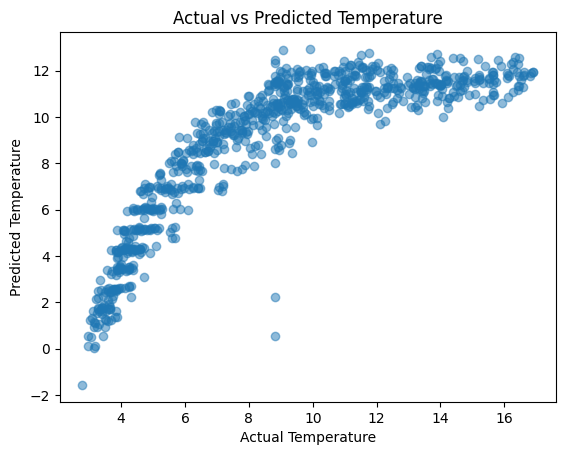

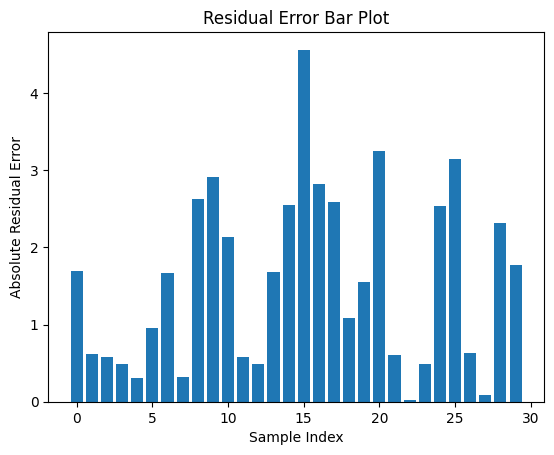

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Priyadharshini B- 24BAD093")

df = pd.read_csv(
    r"/content/bottle.csv",
    low_memory=False
)

lat_col, lon_col = None, None
for col in df.columns:
    if col.lower() in ['lat_dec', 'latitude', 'lat']:
        lat_col = col
    if col.lower() in ['lon_dec', 'longitude', 'lon']:
        lon_col = col

features = ['Depthm', 'Salnty', 'O2ml_L']
if lat_col: features.append(lat_col)
if lon_col: features.append(lon_col)

X = df[features]
y = df['T_degC']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

# PLOT 1: ACTUAL vs PREDICTED

plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.title("Actual vs Predicted Temperature")
plt.show()

# PLOT 2: RESIDUAL ERROR BAR PLOT

# Absolute residuals → no ups & downs
abs_residuals = np.abs(y_test - y_pred)

# Take first 30 samples for clean bar view
abs_residuals = abs_residuals[:30]

plt.figure()
plt.bar(range(len(abs_residuals)), abs_residuals)
plt.xlabel("Sample Index")
plt.ylabel("Absolute Residual Error")
plt.title("Residual Error Bar Plot")
plt.show()


Priyadharshini B
Dataset loaded successfully
                        date    open    high    low   close    volume
0  2022-05-17 09:35:00+05:30  872.00  872.00  872.0  872.00   3759243
1  2022-05-17 09:45:00+05:30  872.00  872.00  872.0  872.00         0
2  2022-05-17 09:55:00+05:30  872.00  918.10  862.0  902.80  12449251
3  2022-05-17 10:05:00+05:30  902.45  908.95  896.0  902.15   5237329
4  2022-05-17 10:15:00+05:30  902.30  905.00  900.0  903.85   1820317

Model Evaluation:
Accuracy : 0.6132971506105834
Precision: 1.0
Recall   : 0.030612244897959183
F1-Score : 0.0594059405940594
Confusion Matrix:
 [[443   0]
 [285   9]]


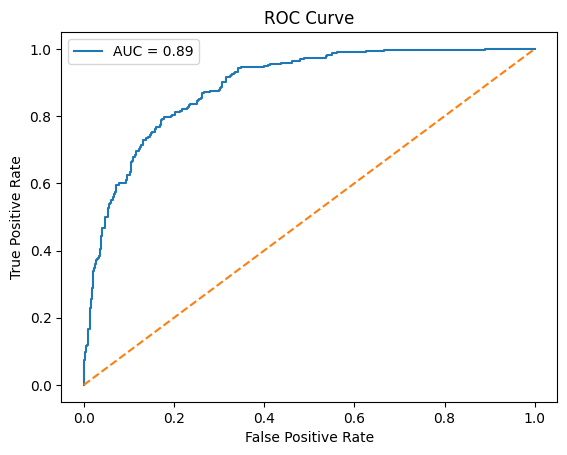

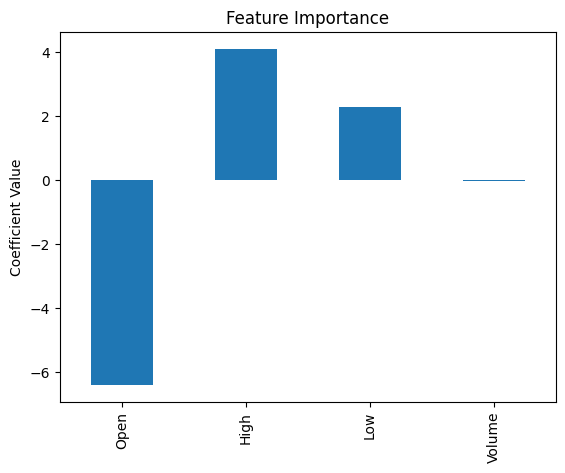


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_curve, auc
)

CSV_PATH = r"/content/LICI - 10 minute data.csv"

df = pd.read_csv(CSV_PATH)

print("Priyadharshini B")
print("Dataset loaded successfully")
print(df.head())


df["Price_Movement"] = np.where(df["close"] > df["open"], 1, 0)


X = df[["open", "high", "low", "volume"]]
y = df["Price_Movement"]

# Handle missing values
X = X.fillna(X.mean())

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluation
print("\nModel Evaluation:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature importance
features = ["Open", "High", "Low", "Volume"]
importance = pd.Series(model.coef_[0], index=features)

plt.figure()
importance.plot(kind="bar")
plt.title("Feature Importance")
plt.ylabel("Coefficient Value")
plt.show()

# Hyperparameter tuning
param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "penalty": ["l2"],
    "solver": ["lbfgs"]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    scoring="f1",
    cv=5
)

grid.fit(X_train, y_train)

print("\nBest Parameters:", grid.best_params_)


Scenario 2

Description:
Classify whether LIC stock price will increase (1) or decrease (0) based on historical data.